#                                             CVS

### Data collection

In [208]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [209]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [210]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [211]:
mydata.head()

,CVS
Date,
1995-01-03,4.515667
1995-01-04,4.497677
1995-01-05,4.515667
1995-01-06,4.515667
1995-01-09,4.479687


In [212]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [213]:
mydata.iloc[0]

CVS    4.515667
Name: 1995-01-03 00:00:00, dtype: float64

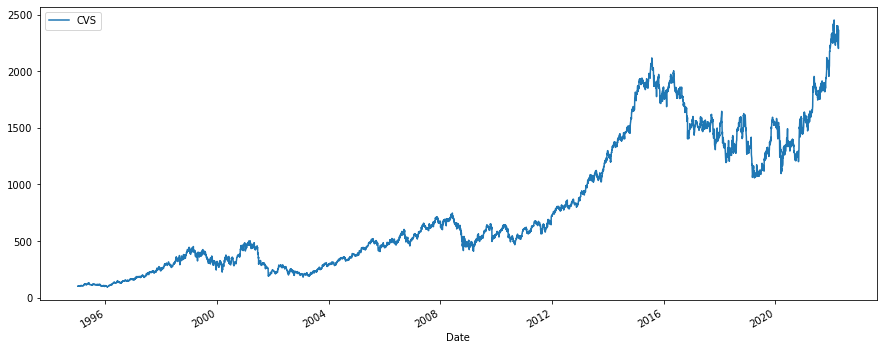

In [214]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on date:

In [215]:
mydata.loc['2019-09-26']

CVS    57.472229
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [216]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [217]:
weights = np.array([1])

In [218]:
np.dot(returns, weights)

array([        nan, -0.00398383,  0.00399976, ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [219]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [220]:
np.dot(annual_returns, weights)

0.16148300027010096

In [221]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [222]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [223]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
1999-12-31,NaN,NaN
2000-01-03,-0.053109,NaN
2000-01-04,-0.008299,NaN
2000-01-05,0.053541,NaN
2000-01-06,-0.073744,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [224]:
returns['CVS'].std()

0.018735884396401267

Annual risk:

In [225]:
returns['CVS'].std() * 250 ** 0.5

0.2962403433511852

### S&P 500

Daily risk:

In [226]:
returns['VOO'].std()

0.010752520794503352

Annual risk:

In [227]:
returns['VOO'].std() * 250 ** 0.5

0.17001228149476952

******

### Volatility:

In [228]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.296240
VOO    0.170012
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

*****

In [229]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000351,0.000090
VOO,0.000090,0.000116


In [230]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.087758,0.022624
VOO,0.022624,0.028904


***

In [231]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.562736
VOO,0.562736,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [232]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [233]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.04047749985822088

Portfolio Volatility:

In [234]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.20119020815691027

In [235]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

20.1 %


***

# The diversifiable and non diversifiable risks of a porfolio

In [236]:
tickers = ['CVS', 'VOO']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
sec_data

,CVS,VOO
Date,,
2007-01-03,23.362820,NaN
2007-01-04,23.484022,NaN
2007-01-05,23.612810,NaN
2007-01-08,23.749168,NaN
2007-01-09,23.491594,NaN
...,...,...
2022-04-04,100.000000,419.850006
2022-04-05,99.459999,414.660004
2022-04-06,102.059998,410.459991


In [237]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3845 entries, 2007-01-03 to 2022-04-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     3845 non-null   float64
 1   VOO     2917 non-null   float64
dtypes: float64(2)
memory usage: 90.1 KB


Then, calculate the diversifiable and the non-diversifiable risk of a portfolio, composed of these two stocks:

a) with weights 0.5 and 0.5;

In [238]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,CVS,VOO
Date,,
2007-01-03,NaN,NaN
2007-01-04,0.005174,NaN
2007-01-05,0.005469,NaN
2007-01-08,0.005758,NaN
2007-01-09,-0.010905,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### Calculating Portfolio Variance

Weightings scheme:

In [239]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [240]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.03627869955106014

### Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

Diversifiable Risk:

In [241]:
CVS_var_a = sec_returns[['CVS']].var() * 250
CVS_var_a

CVS    0.070963
dtype: float64

In [242]:
VOO_var_a = sec_returns[['VOO']].var() * 250
VOO_var_a

VOO    0.028904
dtype: float64

Calculating Diversifiable Risk:

In [243]:
dr = pfolio_var - (weights[0] ** 2 * CVS_var_a) - (weights[1] ** 2 * VOO_var_a)
dr

CVS   NaN
VOO   NaN
dtype: float64

In [244]:
print (str(round(dr*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


Calculating Non-Diversifiable Risk:

In [245]:
n_dr_1 = pfolio_var - dr
n_dr_1

CVS   NaN
VOO   NaN
dtype: float64

In [246]:
print (str(round(n_dr_1*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


*****

# Testing different weight combination for a porfolio. 

In [247]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [248]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.36736251, 0.35901506, 0.27362243])

Expected Portfolio Return:

In [249]:
np.sum(weights * log_returns.mean()) * 250

0.11572673342792222

Expected Portfolio Variance:

In [250]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.07131653430094026

Expected Portfolio Volatility:

In [251]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2670515573834765

In [252]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [253]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

In [254]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)


In [255]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'WMT_weights' : weights_1, 'FB_weights': weights_2, 'BP_weights': weights_3})

In [256]:
portfolios.head()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
0,0.127007,0.329402,0.486847,0.512838,0.000315
1,0.184137,0.262077,0.664892,0.248280,0.086828
2,0.059175,0.377888,0.211663,0.671088,0.117250
3,0.071802,0.306060,0.199369,0.486423,0.314208
4,0.150845,0.216816,0.439514,0.105264,0.455221


In [257]:
portfolios.tail()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
995,0.143694,0.214531,0.395257,0.084694,0.520049
996,0.130854,0.217336,0.347030,0.124092,0.528878
997,0.070674,0.271823,0.148965,0.377075,0.473960
998,0.168313,0.264145,0.601121,0.286241,0.112637
999,0.052920,0.275904,0.059168,0.375075,0.565756


Text(0, 0.5, 'Expected Return')

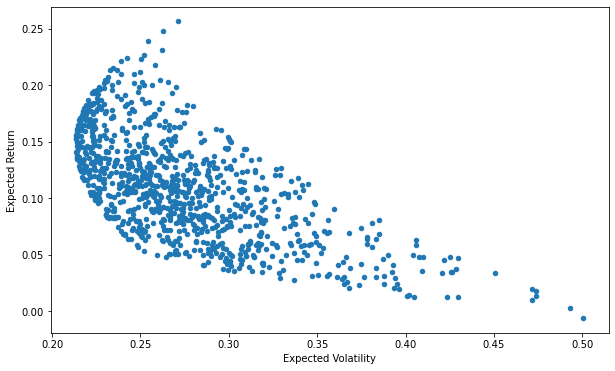

In [258]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [259]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '01-01-2012', end = '12-31-2016')['Adj Close']
    

In [260]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [261]:
cov = stock_return.cov()*250

In [262]:
cov_with_market = cov.iloc[0,1]

In [263]:
market_var = stock_return['^GSPC'].var()*250

In [264]:
stock_beta = cov_with_market / market_var

stock_beta

0.7844123841289852

# Calculated expected return for a stock


### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [265]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.06622061920644925

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [266]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.2650369097607273

# Monte Carlo- Predicting Gross Profit

In [267]:
import numpy as np 
import matplotlib.pyplot as plt

In [268]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [269]:
rev = np.random.normal(rev_m, rev_stdev, iterations)

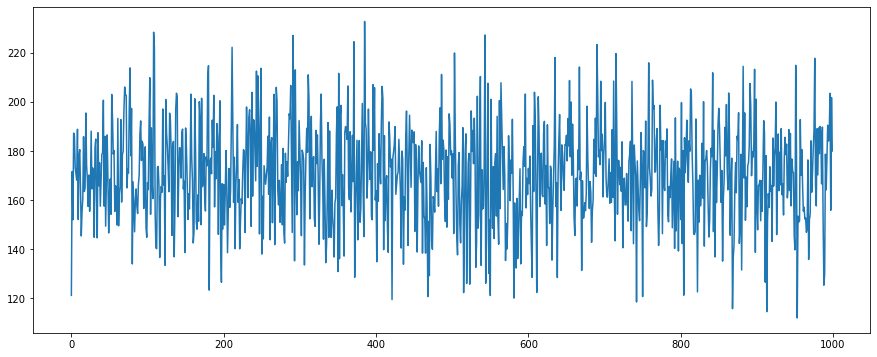

In [270]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

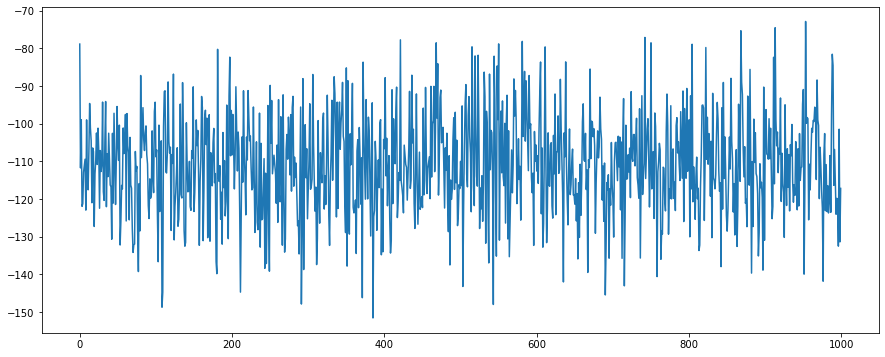

In [271]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [272]:
COGS.mean()

-110.99399350046123

In [273]:
COGS.std()

13.259817986489733

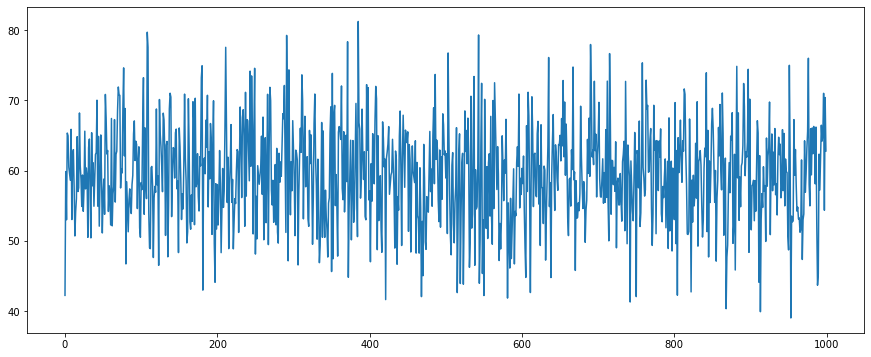

In [274]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [275]:
max(Gross_Profit)

81.20568406673922

In [276]:
min(Gross_Profit)

39.02563644549565

In [277]:
Gross_Profit.mean()

59.45482054456372

In [278]:
Gross_Profit.std()

7.102727579912233

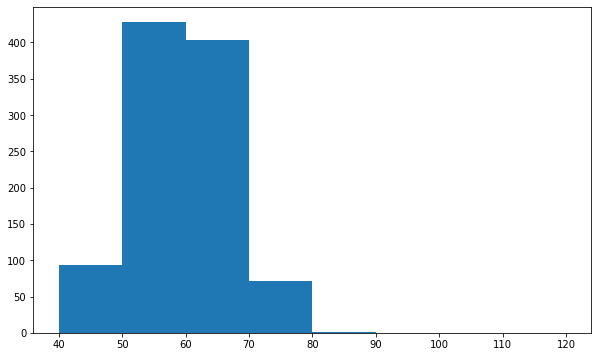

In [279]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

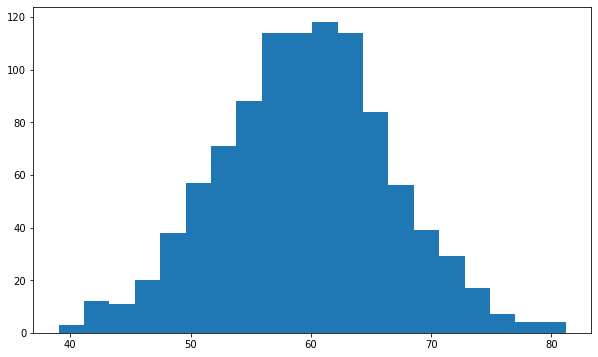

In [280]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [281]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [282]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [283]:
log_return = np.log(1 + data.pct_change())

In [284]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


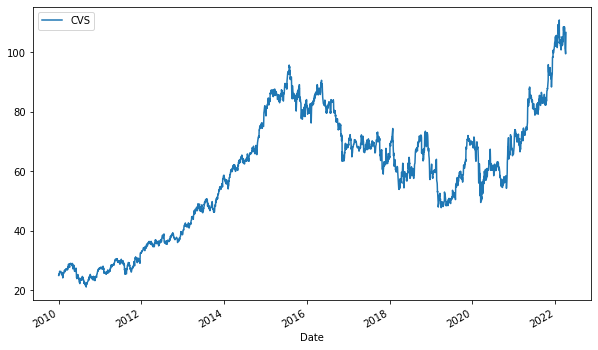

In [285]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

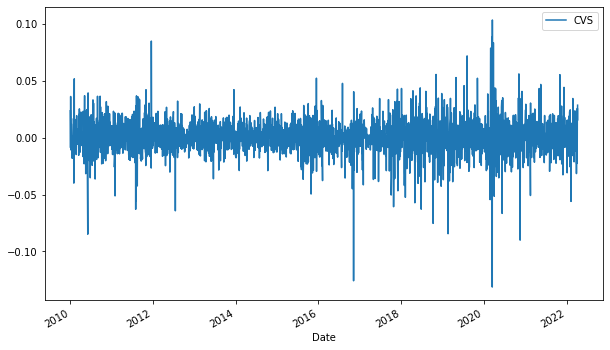

In [286]:
log_return.plot(figsize= (10, 6))

In [287]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [288]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [289]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [290]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [291]:
type(drift)

pandas.core.series.Series

In [292]:
type(stdev)

pandas.core.series.Series

In [293]:
np.array(drift)

array([0.00035668])

In [294]:
drift.values

array([0.00035668])

In [295]:
stdev.values

array([0.01503762])

In [296]:
norm.ppf(0.95)

1.6448536269514722

In [297]:
x = np.random.rand(10,2)
x

array([[0.81728506, 0.30912189],
       [0.3059084 , 0.00682065],
       [0.63729688, 0.15382771],
       [0.41110467, 0.32175933],
       [0.78378619, 0.83154811],
       [0.89900771, 0.57211793],
       [0.01777837, 0.97950481],
       [0.6273422 , 0.53622839],
       [0.66442821, 0.33040183],
       [0.47465269, 0.99409376]])

In [298]:
norm.ppf(x)

array([[ 0.90506701, -0.49834091],
       [-0.5074818 , -2.46657272],
       [ 0.35124276, -1.02015402],
       [-0.22470428, -0.46278476],
       [ 0.78504426,  0.96030092],
       [ 1.27591778,  0.18176883],
       [-2.10196051,  2.04362727],
       [ 0.32482225,  0.09093627],
       [ 0.42457903, -0.43880388],
       [-0.0635791 ,  2.51769749]])

In [299]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.23806348, -0.75131344],
       [-0.20441089, -0.44732443],
       [ 0.48183108, -0.61295027],
       [ 2.64761264, -1.67043543],
       [-0.09013404, -0.33888049],
       [ 1.59089024,  1.15819852],
       [ 0.37889931, -0.89685425],
       [-0.5148366 , -0.27121929],
       [-0.42448339,  0.64193971],
       [-1.50196884,  0.36695951]])

In [300]:
t_intervals = 1000
iterations = 10 

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [301]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [302]:
daily_returns

array([[1.00430149, 1.0168656 , 0.98729148, ..., 1.01349858, 1.01718705,
        1.03787016],
       [1.00525612, 0.98413012, 1.0036588 , ..., 1.00116353, 0.98564497,
        0.98999527],
       [1.00788847, 1.02274543, 0.98141733, ..., 0.99344242, 0.98542845,
        1.01521116],
       ...,
       [1.02543209, 0.99748281, 1.00379026, ..., 1.00135361, 1.00701954,
        1.04056489],
       [0.98719158, 1.00109793, 1.01256189, ..., 0.99056758, 0.97356783,
        0.98873568],
       [0.99989237, 1.00632999, 0.99535613, ..., 1.00075978, 1.01590707,
        0.99060679]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [303]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [304]:
price_list = np.zeros_like(daily_returns)

In [305]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [306]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [307]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [308]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [107.17035548, 104.91811265, 107.0000651 , ..., 106.73404438,
        105.07961125, 105.54339658],
       [108.01576509, 107.30452064, 105.01171825, ..., 106.03412712,
        103.54843826, 107.1488343 ],
       ...,
       [322.42455091, 247.26690966, 292.96255176, ...,  80.77057181,
        218.45896473, 176.61870356],
       [318.29480139, 247.53839125, 296.64271627, ...,  80.00871   ,
        212.68461976, 174.62921309],
       [318.26054433, 249.10530694, 295.26514669, ...,  80.06949888,
        216.06780949, 172.988884  ]])

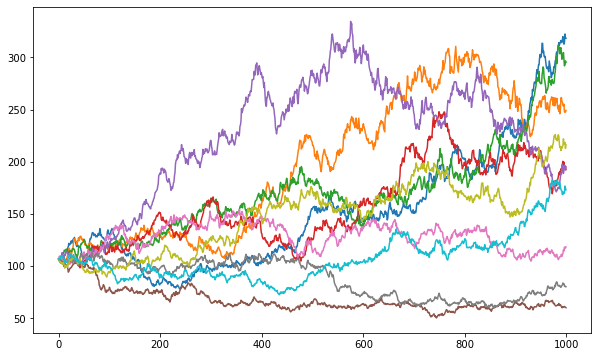

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);